## Final Project Submission

Please fill out:
* Student name: Filiz Camuz
* Student pace: Self Paced 
* Scheduled project review date/time: end of June
* Instructor name: Eli
* Blog post URL: 


# Title

dgsdfsd
sdgfsdkgfs
sdjfskdf



##OSEMN Process¶
#Obtain

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

#Scrub

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.

#Explore

This step focuses on getting to know the dataset you're working with. This step tends to blend with the Scrub step mentioned above. During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that. At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.

#Model

This step consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model.

#Interpret

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data. That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.


###Obtain

The requiremen for this project is to come up with a model to predict house price in Kings County.  area. The Kings County Housing Data dataset was given to solve this problem. Now I will import the necessary libraries and the dataset to explore. 


In [671]:
#import all necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set(style='whitegrid')

# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

# Feature Selection
from sklearn.feature_selection import RFE
# Scaler
from sklearn.preprocessing import MinMaxScaler


In [672]:
# Loading data into pandas DataFrame
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


There are 21 rows, I can not see all the column names. I will paste the column descriptions below. 

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price  is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number  of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15**- The square footage of the land lots of the nearest 15 neighbors



Some column names are not well described (view, sqrft_living15, sqrft_lot15).  

In [673]:
df.shape

(21597, 21)

In [674]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [676]:
# Data types are numeric and string. 

# Data Scrubbing

First thing I will check is the null values: I will use .isna() for that purpose. Before that, I will delete the id column which I do not need this feature for this project. 

In [677]:
df.drop(['id'], axis=1, inplace=True)

In [678]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The view feature has only 63 missing value, however, waterfront has 2376, and yr_renovated has 3842 null values out of 21597 observations. I will check each one of them individually to see what I can do for those missing values.     

## Null values

### view & waterfront

In [679]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

I have checked the unique values; there are values like 0,1,2,3,4. I first assumed these are the number of times this house was viewed by buyers before a purchase.However it sounds a bit odd to buy a house without viewing at least once. So the other option would be some sort of appealing view is available for this house. Although there is one feature as "waterfront", this could be a general clolumn identifying the houses has some special views  such as forest, city..etc I woudl like to check if there is such relationship between waterfron and view in that term.    

I want to first check if all view values are different than 0 for all of the waterfront values are 1. 


In [680]:
df.view[df['waterfront']==1].value_counts()

4.0    123
3.0     14
2.0      7
1.0      1
Name: view, dtype: int64

In [681]:
df.waterfront[df['view']==0].value_counts()

0.0    17312
Name: waterfront, dtype: int64

There is no 0 in the view when waterfront is 1 and waterfron is always 0 when view is 0 except null values. I can use this information for filling out some of the null values. 
Beacuse it means that when view is 0 then null values in waterfront should be replaced with 0. 

In [682]:
df.waterfront[df['view']==0]=0

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [683]:
df.waterfront.isna().sum()

266

This took care of most of the missing values in waterfront. Rest of them is unknown. Lets see how the values are distributed.

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


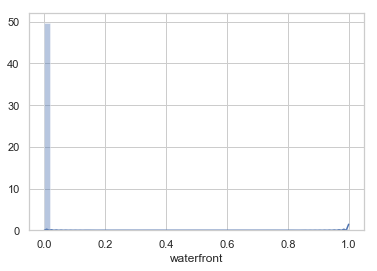

In [684]:
sns.distplot( df[df.waterfront.notna()]['waterfront'] )

The number of 1 values are comparingly too small so I have used distplot to visualise. It wOuld not hurt the convert rest of the null values in to 0 because it would not do any dramatic effect on the result and I can still keep the rest of the data for the other features in those rows.  

In [685]:
df.waterfront=df.waterfront.fillna(0)


Now let's see how the view distirbuted. 

# of missing values in the view column 63


Text(0,0.5,'# of Houses')

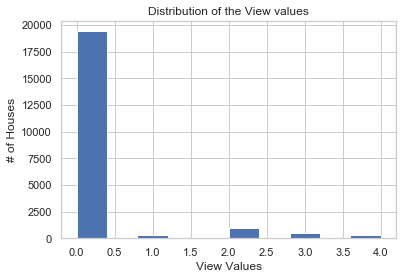

In [686]:
print("# of missing values in the view column", df.view.isna().sum())

df.view.hist()
plt.title("Distribution of the View values")
plt.xlabel("View Values")
plt.ylabel("# of Houses")

Missing values in the view is also small number and the value of "0" is vrey large. I can replace all nul values with "0".

In [687]:
df.view=df.view.fillna(0)
df.view.isna().sum()

0

## yr_renovated

In [688]:
df.yr_renovated.unique()



array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

I would like to cross check this feature and date feature. Because there is already a yr_built for year. So what about date? 


In [689]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Text(0,0.5,'Number of Renovated House')

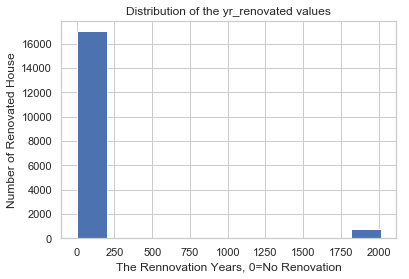

In [690]:
df.yr_renovated.hist()
plt.title("Distribution of the yr_renovated values")
plt.xlabel("The Rennovation Years, 0=No Renovation")
plt.ylabel("Number of Renovated House")

When I compare the values in the same rows, it seems no connection. the date is probably the last date that the house was sold. No luck on yr_renovation. So, since there is no information about renovation for nan values, I will just fill them with "0". Also, the number of renovated house are so small. I was planning to bin those years but, since the number is very small, it will be better to convert this column as renovated or non-renovated. 

In [691]:
df.yr_renovated=df.yr_renovated.fillna(0)
df.yr_renovated[df.yr_renovated!=0]=1
df.yr_renovated.value_counts()


/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

So far , I took care of all null values in the dataset. Now let me check if there is any place holders. 


## Place holders

I have checked all features' unique values and value counts. There is only one placeholder in sqft_basement. It is the "?". Since it is not a number.I have noticed that sqft_basement feature is object type. I wanted to convert it to float, but because of a string value ("?"), it did not let me to do. To be able replace ? with any number, I need to convert them to NaN. Because that is a value both str and onject category can recognize.

In [692]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [693]:
df.sqft_basement[df.sqft_basement=='?'].count()

454

In [694]:
df['sqft_basement'] = np.where(
    df.sqft_basement.eq('?'), np.NaN, df['sqft_basement'] .str[:-1]
)

In [695]:
df.sqft_basement=df.sqft_basement.astype('float')

My first intention was filling NaN with the mean of this column, however, I wanted to see if there is any  relationship between 'sqft_basement', 'sqft_above', 'sqft_living' features. What I have noticed is sqft_basement is the difference between other two features. So I will replace all sqrt_basement column with this calculation. 

In [696]:
df[['sqft_basement', 'sqft_above', 'sqft_living']].head()

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680


In [697]:
df['sqft_basement'] = df [ 'sqft_living']- df['sqft_above']

In [698]:
df.sqft_basement.value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

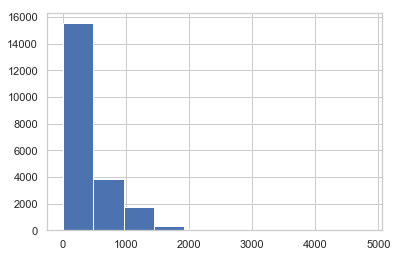

In [699]:
df.sqft_basement.hist()

Large number of 0s skews this feature dramaticaly. I will convert this 1s and 0s. 

In [700]:
df.sqft_basement[df.sqft_basement!=0]=1
#df.sqft_basement.value_counts()

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Exploration

Now, I will check distribution for all values. But first, convert the 'date' type to datetime. 

In [701]:
df['date'] = pd.to_datetime(df['date'])

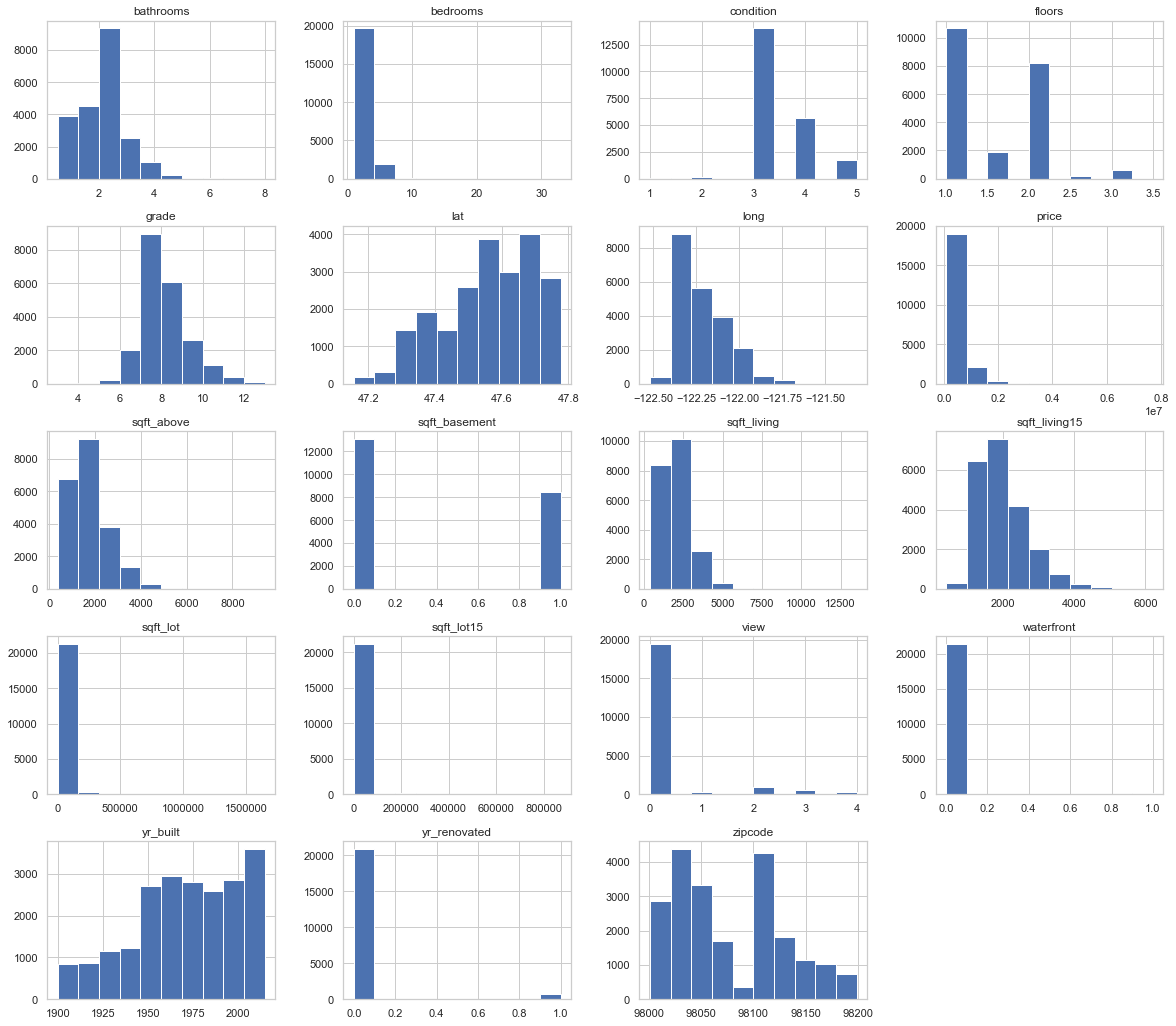

In [702]:
df.hist(figsize = (20,18));

In [703]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Now I will check individual kde for all of them.  

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


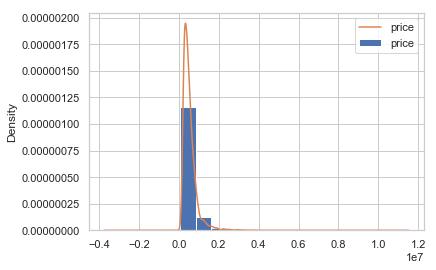

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


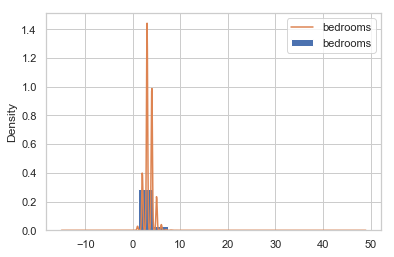

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


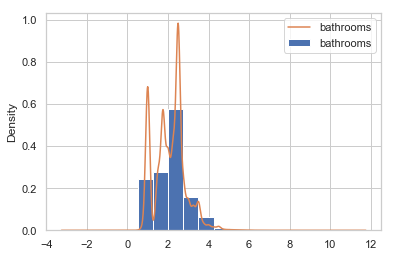

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


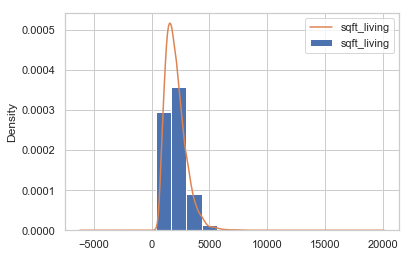

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


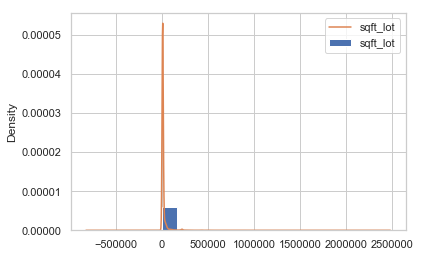

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


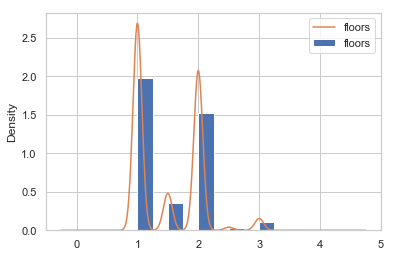

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


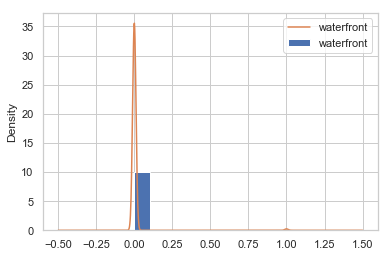

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


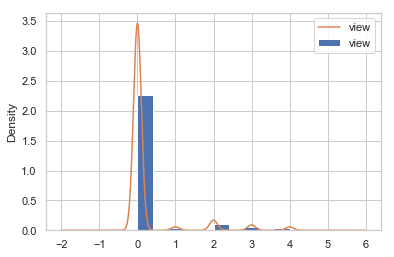

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


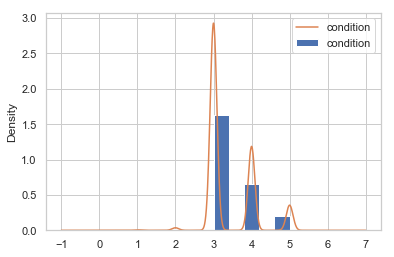

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


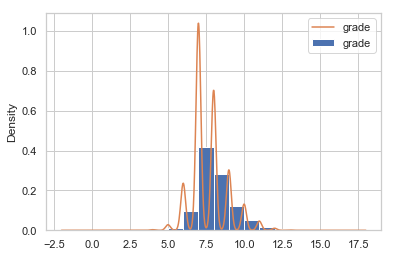

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


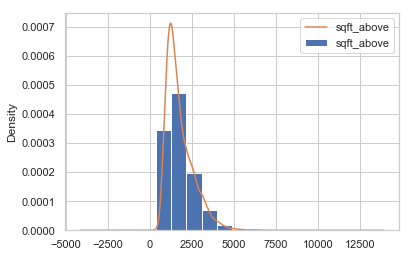

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


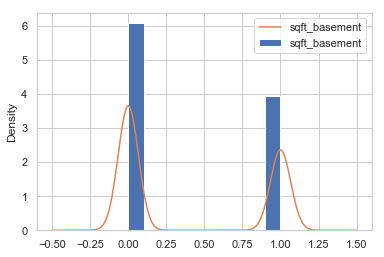

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


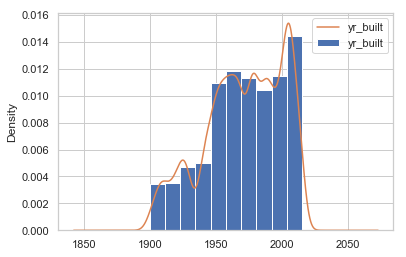

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


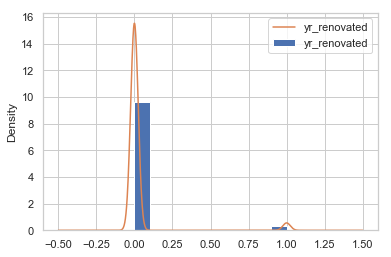

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


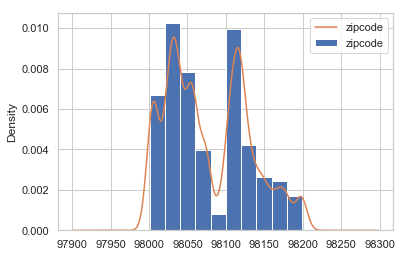

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


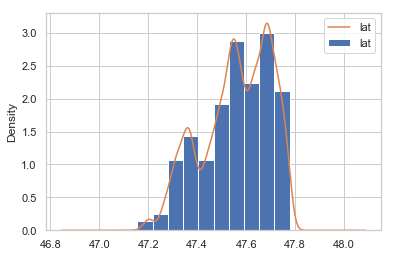

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


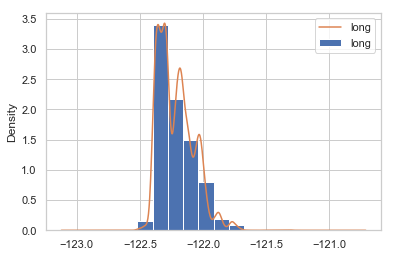

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


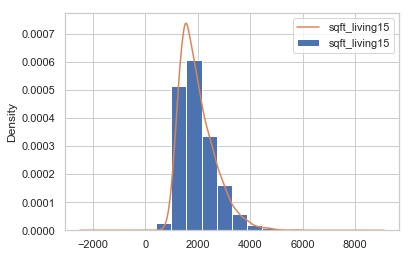

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


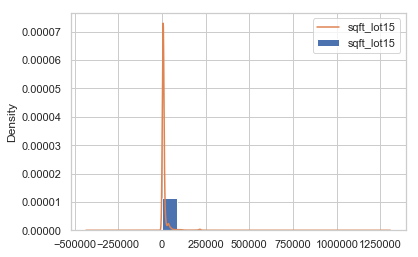

In [704]:
cols=[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

#cols=df.columns

for i in cols:
    df[i].plot.hist(normed=True )
    df[i].plot.kde(label=i )
    plt.legend()
    plt.show()

Almost all features are skewed and have long tails. Outliers are big problem. Some of the features two ore more peeks. I will make most of those category type. 

 # Do builders make the lot size bigger comparing to living area as the years pass?
 
 I will plot yr_built and compare sqft_living and sqft_lot to see if that is true. 

No handles with labels found to put in legend.


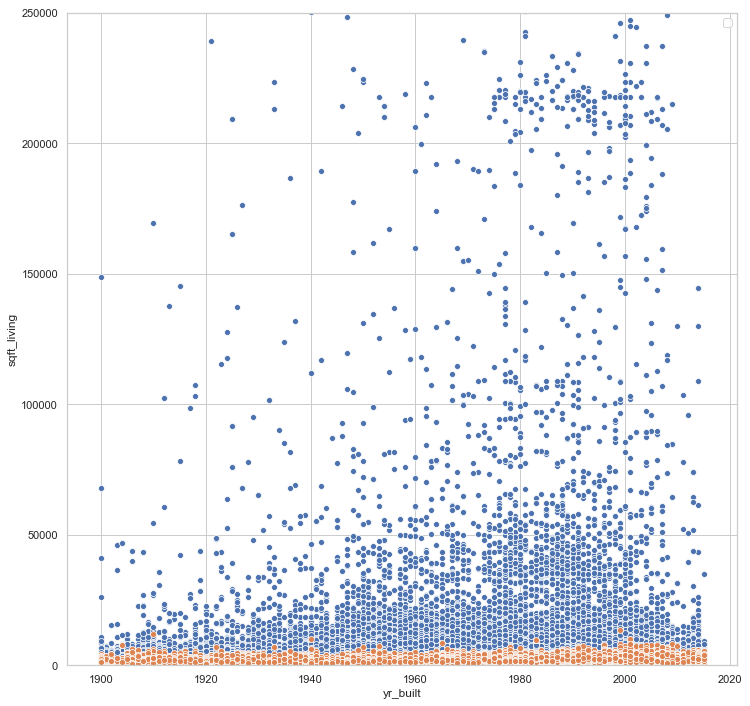

In [705]:
plt.figure(figsize=(12,12))
plt.ylim(0,250000)
sns.scatterplot(df.yr_built, df.sqft_lot)
sns.scatterplot(df.yr_built, df.sqft_living)
plt.legend()

I can see that there is increase in the lot size over the years and some extreme lot sizes apper after 1980. Let me check the percentage of the living  area and lot size.   

No handles with labels found to put in legend.


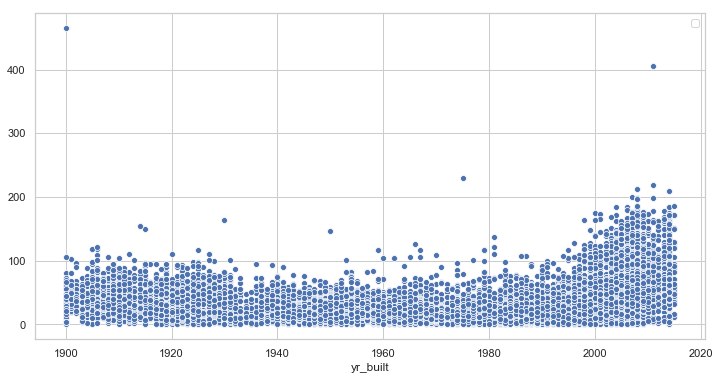

In [706]:
lotpercent=(df.sqft_living/df.sqft_lot)*100
plt.figure(figsize=(12,6))

sns.scatterplot(df.yr_built, lotpercent)

plt.legend()

According to this scatter plot, most of the houses were around %100 size of the lot, after around 1930 houses were built with less lot size. But we see a dramatic increase in the lot size 1990s. The increase we see might be a real "Yes " to my question or might be just some extreme sizes effecting the plot. I would like to check the number of the houses that lot size bigger than %100 of the living area size over the years. Here is my next question; 

# Were more houses built that has large lot size ( >%100 of the living area) over the years? 

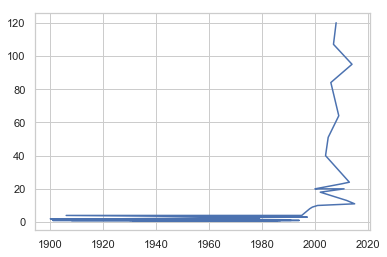

In [707]:
df.yr_built.loc[(lotpercent>100)].value_counts().plot()

Ok, so that answers my question. It is obvious that, more houses were built with larger lots after late 90s. Ok then so what? I wonder if that is because of general demand or some luxury options.
Here is the next question. 

#  How does the lot & living size effect the price?

So, we know that more houses has bigger lots. Now I want to see how the price comprimised by lot and living area size. First I want to see, price, lot and living size on a scatter plot.

No handles with labels found to put in legend.


Text(0.5,0,'Price')

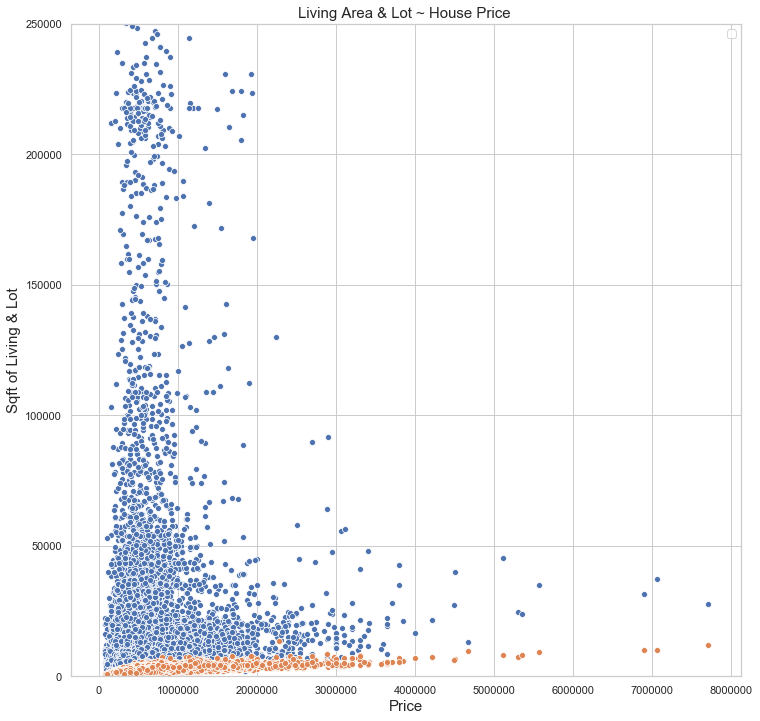

In [708]:
plt.figure(figsize=(12,12))
plt.ylim(0,250000)
sns.scatterplot(df.price, df.sqft_lot)
sns.scatterplot(df.price, df.sqft_living)
plt.legend()
plt.title('Living Area & Lot ~ House Price ', size=15)
plt.ylabel('Sqft of Living & Lot', size=15)
plt.xlabel('Price', size=15)


Well, it looks like an interesting relationship. I would like to see each of them seperately on the scatter plot.

Text(0.5,0,'Price')

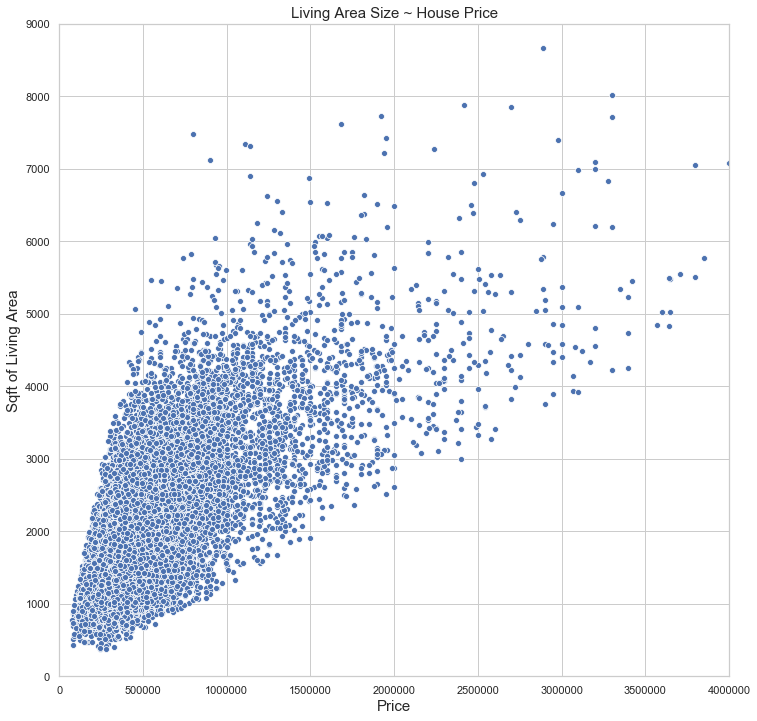

In [709]:
plt.figure(figsize=(12,12))
sns.scatterplot(df.price, df.sqft_living)
plt.xlim(0,4000000)
plt.ylim(0,9000)
plt.title('Living Area Size ~ House Price', size=15)
plt.ylabel('Sqft of Living Area', size=15)
plt.xlabel('Price', size=15)

Text(0.5,0,'Price')

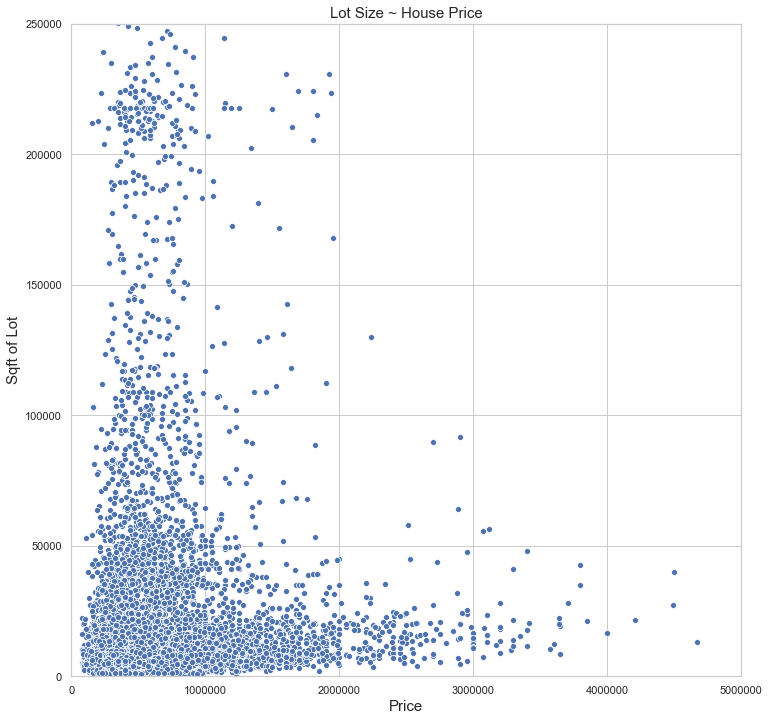

In [710]:
plt.figure(figsize=(12,12))
sns.scatterplot(df.price, df.sqft_lot)
plt.xlim(0,5000000)
plt.ylim(0,250000)
plt.title('Lot Size ~ House Price', size=15)
plt.ylabel('Sqft of Lot', size=15)
plt.xlabel('Price', size=15)

From these plots, I can say that there is a positif and more linear relationship between price and living area size.But for lot size and price, the relationship is different. For most of the houses have large lots, price is in 1 million range. And there are many houses with small lots price range is very high. That sounds like there is not significant direct relationship between price and lot size. So, having larger lot might not be everyones demand, but larger living area size seems preferable for most of the buyers. In this case the next question would be where might be a good choise to built a house with bigger lot.  

# How houses are located by price and lotsize?

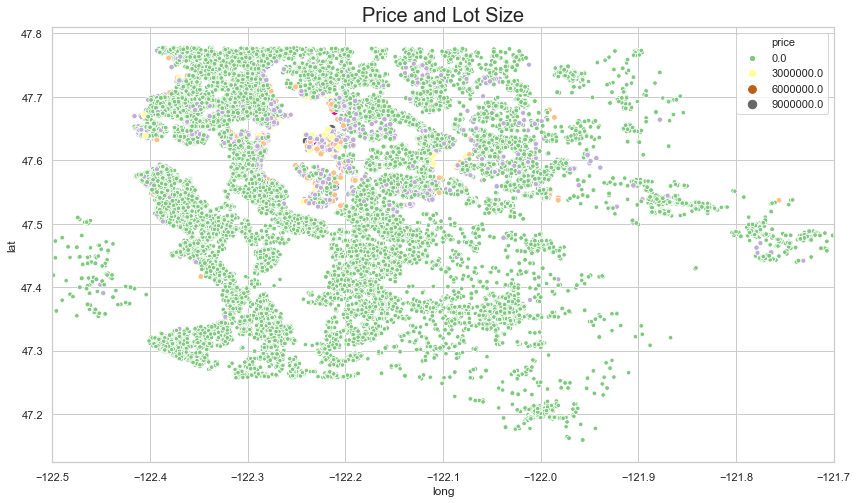

In [736]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.price, size=df.price, palette='Accent')
plt.xlim(-122.5, -121.7)
plt.title('Price and Lot Size', fontdict={'fontsize': 20})
plt.show()

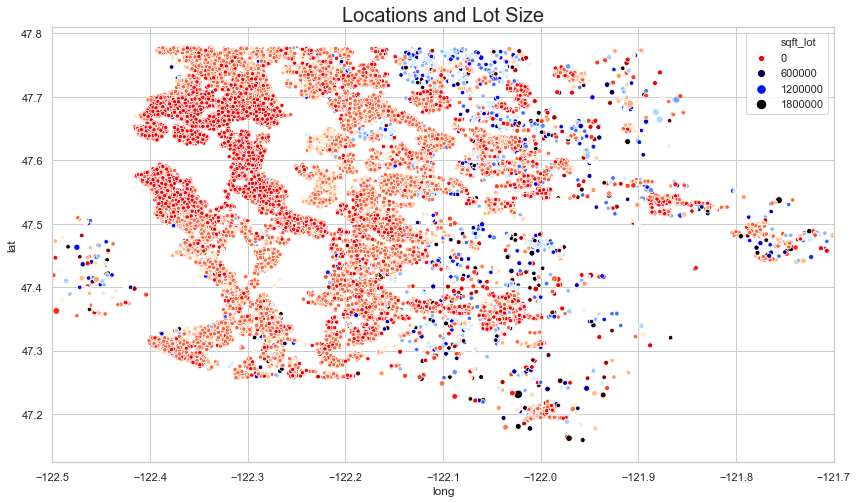

In [716]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.sqft_lot, size=df.sqft_lot, palette='flag')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Lot Size', fontdict={'fontsize': 20})
plt.show()

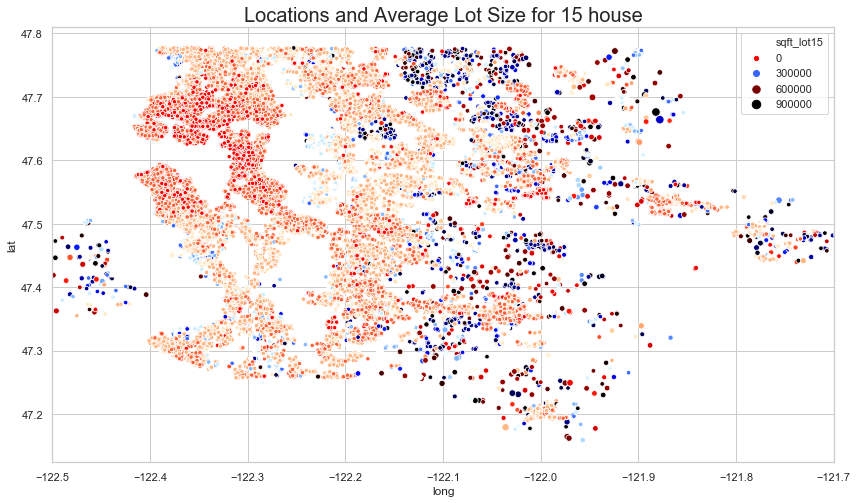

In [717]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.sqft_lot15, size=df.sqft_lot15, palette='flag')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Average Lot Size for 15 house', fontdict={'fontsize': 20})
plt.show()

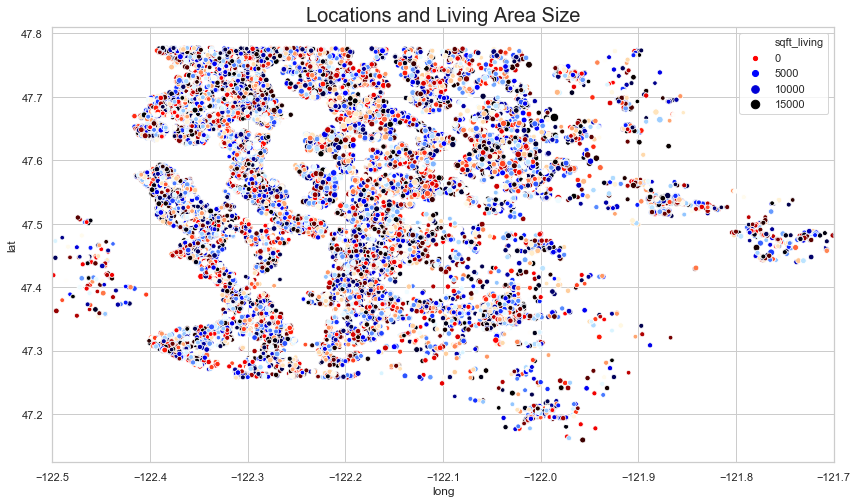

In [721]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.sqft_living, size=df.sqft_living, palette='flag')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Living Area Size', fontdict={'fontsize': 20})
plt.show()

## Correlation

Before I start label encoding I want to check correlation matrix to see if there is any column that I need to drop.  

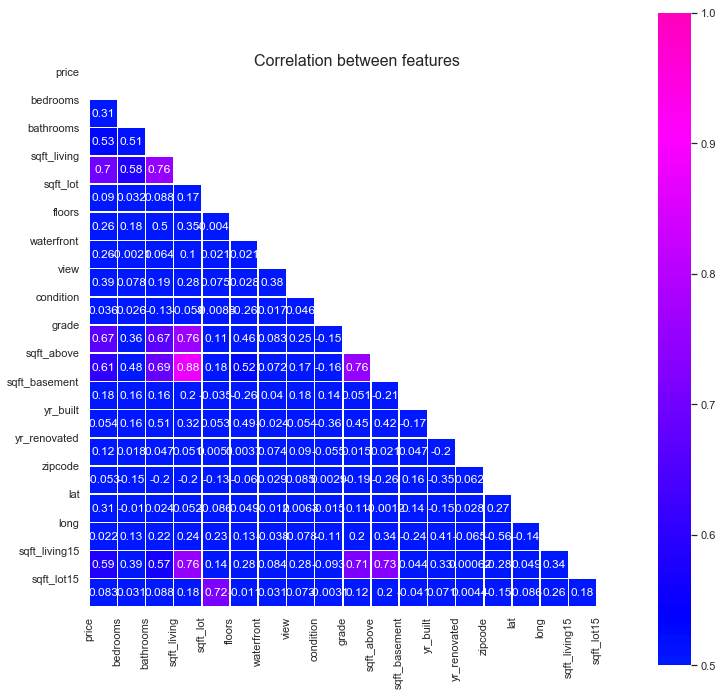

In [568]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, center=0, vmin=0.5, square=True, linewidths=.5, cmap='gist_rainbow')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()



There is strong correlation between  sqft_above, bathrooms and sqft_living. I will drop sqft_above because sqft_living might be more handy for further analysis

In [569]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [570]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
sqft_basement    0.180082
yr_renovated     0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

The correlation between price and zipcode is negative, so I want to drop zipcode as well. 

In [571]:
df=df.drop('sqft_above', axis=1)
df=df.drop('grade', axis=1)
df=df.drop('bathrooms', axis=1)
df=df.drop('zipcode', axis=1)

### Binning ( yr_built, lat, long  )

In [572]:
#Binning yr_built
df.yr_built.describe()

built_bins=[1900,1930,1960,1990,2020]
labels=['1900_1930', '1930_1960','1960_1990','1990_2020']
bins_built= pd.cut(df['yr_built'], built_bins , labels=labels )
bins_built = bins_built.cat.as_unordered()
df.yr_built=bins_built


#Binning long
segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]
df.long = pd.cut(df.long, bins, labels=labels)


#Binning lat
segments = 10
bins = list(np.linspace(df.lat.min(), df.lat.max(), num=segments))
bins
labels = [i for i in range(1,segments)]
df.lat = pd.cut(df.lat, bins, labels=labels)
 

In [573]:
df.yr_built.unique()

[1930_1960, 1960_1990, 1990_2020, 1900_1930, NaN]
Categories (4, object): [1930_1960, 1960_1990, 1990_2020, 1900_1930]

### Category Types

I will convert nine features to category type. I will put them in to a list and do this task in a loop. 

In [574]:
# floors has decimal values and during hot encoding that will be problem.I first round them to one digit and convert them to int so that I do not have  "." in dummy names.
# It actually happened and I had to come back to this part and fix the problem
df=df.round({'floors': 0})
df.floors=df.floors.astype(int)
df.waterfront=df.waterfront.astype(int)
df.view=df.view.astype(int)

cat_list=['yr_built','condition','long','lat','waterfront','floors','view', 'bedrooms','sqft_basement']

In [575]:
df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=df[i].astype('category')

### One-Hot-Encoding

Using the same list, i will create dummies, add them to the dataframe and drop the original column.

In [576]:
for i in cat_list:
    dummies=pd.get_dummies(df_cat[i],prefix=i, drop_first=True)
    df_cat=df_cat.join(dummies)
    df_cat.drop([i], axis=1, inplace=True)


In [577]:
#check if everything looks ok.
#df_cat.info()
df_cat.head(3)

,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,long_2,long_3,long_4,...,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling & Normalization

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


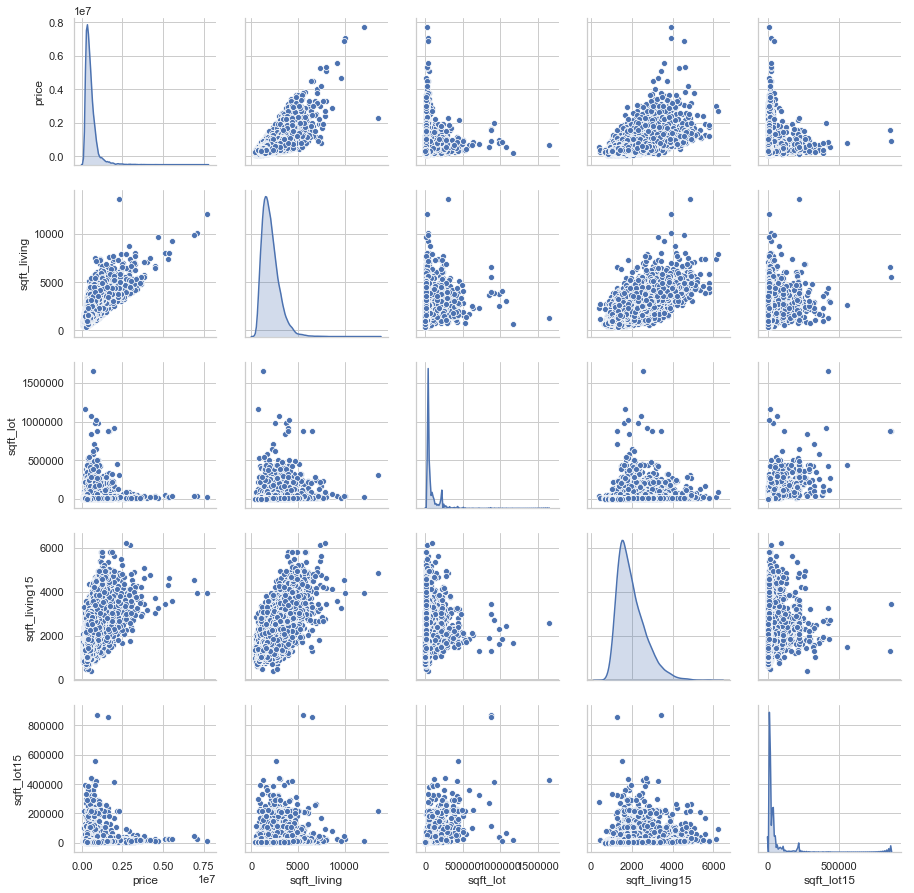

In [578]:
df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
g = sns.pairplot(df_cont, diag_kind="kde")

### Skewed features
I will use quantile transformation from sklearn.preprocessing library for continues features to fix skewness and scaling them. 

In [579]:
from sklearn.preprocessing import quantile_transform

transform = quantile_transform(df_cont[['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']],
                                    output_distribution = 'normal')

trans_features = pd.DataFrame(transform)
trans_features.columns=['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


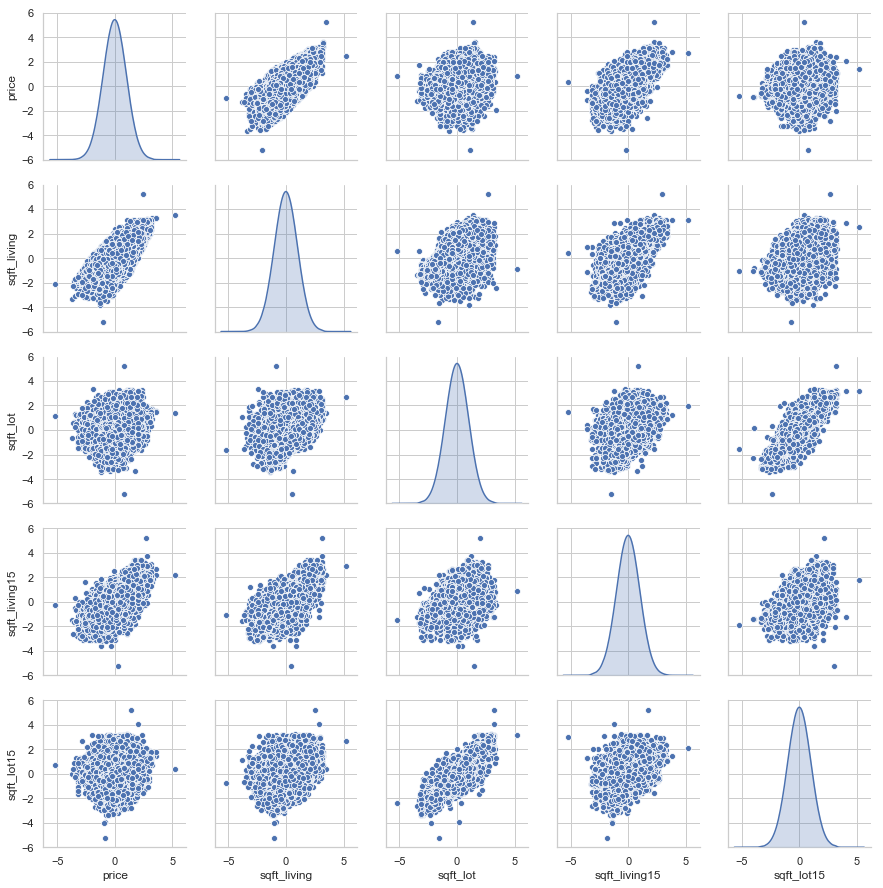

In [580]:
g = sns.pairplot(trans_features, diag_kind="kde")

Now I have a set of fatures that normal distributed. Now I can start modeling. 

In [581]:
trans_features.head()

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,-1.524727,-1.109378,-0.517790,-1.037937,-0.517790
1,0.325577,0.694311,-0.115464,-0.247134,0.007616
2,-2.013671,-2.131682,0.562796,1.064091,0.154186
3,0.559811,0.051460,-0.718462,-0.985610,-0.744694
4,0.226489,-0.293986,0.128003,-0.062770,-0.040336


# Modeling

## OLS Statmodels

OLS Regression model only with transformed continues features. 

In [582]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = trans_features.drop(['price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=trans_features).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5354.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:20:45   Log-Likelihood:                -23204.
No. Observations:               21597   AIC:                         4.642e+04
Df Residuals:                   21592   BIC:                         4.646e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0001      0.005     -0.031      0.975      -0.010       0.009
sqft_living       0.5178      0.007     71.207      0.000       0.504       0.532
sqft_lot         -0.0685      0.013     -5.366      0.000      -0.094      -0.043
sqft_living15     0.2811      0.007     37.803      0.000       0.267       0.296
sqft_lot15       -0.1101      0.013     -8.613      0.000      -0.135      -0.085
==============================================================================
Omnibus:                      265.095   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.786
Skew:                          -0.182   Prob(JB):                     1.14e-48
Kurtosis:                       2.665   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS Regression with categoical and continues features

In [583]:
df_final=pd.concat([trans_features, df_cat], axis=1)


In [584]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df_final.drop(['price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df_final).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1950.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:20:45   Log-Likelihood:                -12732.
No. Observations:               21597   AIC:                         2.556e+04
Df Residuals:                   21549   BIC:                         2.594e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2979      0.094    -13.806      0.000      -1.482      -1.114
sqft_living            0.4816      0.006     76.821      0.000       0.469       0.494
sqft_lot               0.0850      0.008     10.360      0.000       0.069       0.101
sqft_living15          0.1710      0.005     34.630      0.000       0.161       0.181
sqft_lot15            -0.0078      0.008     -0.966      0.334      -0.024       0.008
yr_built_1930_1960    -0.1805      0.011    -15.717      0.000      -0.203      -0.158
yr_built_1960_1990    -0.2042      0.012    -17.003      0.000      -0.228      -0.181
yr_built_1990_2020    -0.0416      0.013     -3.200      0.001      -0.067      -0.016
condition_2            0.4928      0.088      5.603      0.000       0.320       0.665
condition_3            0.8296      0.082     10.160      0.000       0.670       0.990
condition_4            0.9392      0.082     11.493      0.000       0.779       1.099
condition_5            1.0460      0.082     12.722      0.000       0.885       1.207
long_2                -0.2242      0.014    -16.370      0.000      -0.251      -0.197
long_3                -0.2169      0.015    -14.527      0.000      -0.246      -0.188
long_4                -0.2716      0.016    -16.950      0.000      -0.303      -0.240
long_5                -0.5959      0.021    -27.744      0.000      -0.638      -0.554
long_6                -0.1209      0.031     -3.857      0.000      -0.182      -0.059
long_7                 0.0558      0.102      0.547      0.584      -0.144       0.256
long_8                -1.5166      0.310     -4.893      0.000      -2.124      -0.909
long_9                -1.2731      0.114    -11.147      0.000      -1.497      -1.049
lat_2                 -0.1006      0.038     -2.638      0.008      -0.175      -0.026
lat_3                 -0.0112      0.034     -0.326      0.744      -0.078       0.056
lat_4                  0.0927      0.034      2.690      0.007       0.025       0.160
lat_5                  0.3030      0.034      8.852      0.000       0.236       0.370
lat_6                  0.9348      0.034     27.865      0.000       0.869       1.001
lat_7                  1.4277      0.034     42.291      0.000       1.362       1.494
lat_8                  1.4457      0.034     42.821      0.000       1.380       1.512
lat_9                  0.9157      0.034     27.025      0.000       0.849       0.982
waterfront_1           0.6186      0.044     13.946      0.000       0.532       0.706
floors_2               0.0561      0.009      6.444      0.000       0.039       0.073
floors_3               0.0924      0.022      4.281      0.000       0.050       0.135
floors_4               0.1549      0.167      0.930      0.352      -0.171       0.481
view_1                 0.2659      0.0


The model looks pretty good for an initial fit! We get a R-squared of 0.810 and an adjusted R-squared of 0.809. The contribution of the categorical featues is totaly positive to the model.

The p-values for the continuous variables look pretty good except sqft_lot15. Only a few categorical variables  have p-values greater than the 0.05 confidence threshold. I will eliminate some of these values in the next iteration of the model by using only the features has p values greater than 0.05 and observe how it affects the goodness of fit.


### Features have p-values > 0.05

In [585]:
pvalues = pd.DataFrame(model.pvalues, columns=['p'])
features = list(pvalues[pvalues.p < 0.05].index)
features.remove('Intercept')


In [586]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
#predictors = df_final.drop(['price'], axis=1)
pred_sum = "+".join(features)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2350.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:20:45   Log-Likelihood:                -12735.
No. Observations:               21597   AIC:                         2.555e+04
Df Residuals:                   21557   BIC:                         2.587e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3227      0.084    -15.782      0.000      -1.487      -1.158
sqft_living            0.4806      0.006     77.769      0.000       0.469       0.493
sqft_lot               0.0788      0.005     17.419      0.000       0.070       0.088
sqft_living15          0.1705      0.005     35.016      0.000       0.161       0.180
yr_built_1930_1960    -0.1817      0.011    -15.906      0.000      -0.204      -0.159
yr_built_1960_1990    -0.2057      0.012    -17.297      0.000      -0.229      -0.182
yr_built_1990_2020    -0.0411      0.013     -3.174      0.002      -0.066      -0.016
condition_2            0.4904      0.088      5.578      0.000       0.318       0.663
condition_3            0.8267      0.082     10.131      0.000       0.667       0.987
condition_4            0.9360      0.082     11.464      0.000       0.776       1.096
condition_5            1.0433      0.082     12.700      0.000       0.882       1.204
long_2                -0.2251      0.014    -16.565      0.000      -0.252      -0.198
long_3                -0.2182      0.015    -14.766      0.000      -0.247      -0.189
long_4                -0.2726      0.016    -17.284      0.000      -0.304      -0.242
long_5                -0.5977      0.021    -28.172      0.000      -0.639      -0.556
long_6                -0.1231      0.031     -3.948      0.000      -0.184      -0.062
long_8                -1.5180      0.309     -4.905      0.000      -2.125      -0.911
long_9                -1.2765      0.114    -11.185      0.000      -1.500      -1.053
lat_2                 -0.0912      0.021     -4.256      0.000      -0.133      -0.049
lat_4                  0.1030      0.014      7.140      0.000       0.075       0.131
lat_5                  0.3132      0.014     22.913      0.000       0.286       0.340
lat_6                  0.9457      0.012     77.117      0.000       0.922       0.970
lat_7                  1.4382      0.013    111.730      0.000       1.413       1.463
lat_8                  1.4568      0.013    116.482      0.000       1.432       1.481
lat_9                  0.9258      0.013     73.615      0.000       0.901       0.950
waterfront_1           0.6171      0.044     13.925      0.000       0.530       0.704
floors_2               0.0561      0.009      6.466      0.000       0.039       0.073
floors_3               0.0924      0.022      4.290      0.000       0.050       0.135
view_1                 0.2656      0.025     10.759      0.000       0.217       0.314
view_2                 0.2501      0.015     16.743      0.000       0.221       0.279
view_3                 0.3602      0.020     17.745      0.000       0.320       0.400
view_4                 0.5335      0.031     17.377      0.000       0.473       0.594
bedrooms_3            -0.0922      0.0

Again I got a R-squared of 0.810 and an adjusted R-squared of 0.809. There is no significant difference but I now only have features with p_value  smaller than 0.05 in my model.  

## Sklearn Models 

Let's also model with scikit-learn and get the mean squared error (MSE) for the training data. MSE is the average squared difference between the predicted and actual values. I will write a function as 'sklearnmodel' since I will run this model multiple times. 

In [603]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def sklearnmodel (y, X):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    #Calculating predictions on the train set, and on the test set
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    #Calculating your residuals
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test

    #Calculating the Mean Squared Error
    from sklearn.metrics import mean_squared_error
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)

    # Visualization of selection of 100 house prices
    plt.figure(figsize=(16,6))
    sns.scatterplot(range(len(y_hat_test[:100])), y_hat_test[:100], label='Predicted Prices')
    sns.scatterplot(range(len(y_hat_test[:100])), y_test[:100], label='Actual Prices')
    plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 15}), plt.xlabel('Observation'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return (linreg)
    
    

R^2 Score: 0.81
Train Mean Squarred Error: 0.1893640838418413
Test Mean Squarred Error: 0.19346137192464902


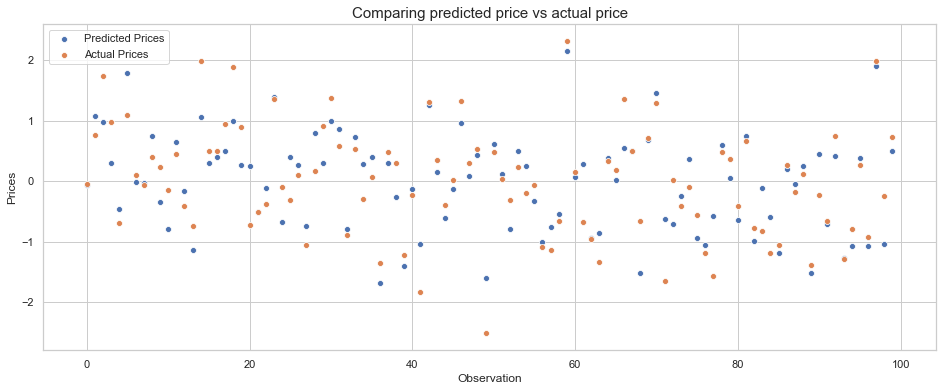

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [604]:
#defining the target and the predictors
y = df_final.price
X = df_final.drop(['price'], axis=1)


#Running the model with df_final for all independent and dependent features.
sklearnmodel (y, X)

So far so good. The model accuracy is 81% and MSE is 0.19. I believe that is a good number. I will run the stepvise feature selection to see if the new set of features would improve my model. 


### Stepwise Selection

In [605]:
#Perform stepwise selection

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [606]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  lat_3                          with p-value 0.0
Add  lat_7                          with p-value 0.0
Add  lat_8                          with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  lat_6                          with p-value 0.0
Add  lat_9                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  waterfront_1                   with p-value 3.75158e-197
Add  long_5                         with p-value 8.6241e-82
Add  lat_5                          with p-value 2.53534e-77
Add  view_3                         with p-value 1.07507e-56
Add  view_4                         with p-value 2.26039e-59
Add  view_2                         with p-value 7.27459e-66
Add  condition_5                    with p-value 8.31326e-50
Add  yr_built_1960_1990             with p-value 8.22739e-46
Add  condition_4                    with p-value 2.70844e-47
Add  yr_built_1930_1960             with p-value 7.04831e-42
Add  sqft_lot      

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  lat_2                          with p-value 0.00805862
Drop lat_3                          with p-value 0.753113
resulting features:
['lat_7', 'lat_8', 'sqft_living15', 'lat_6', 'lat_9', 'sqft_living', 'waterfront_1', 'long_5', 'lat_5', 'view_3', 'view_4', 'view_2', 'condition_5', 'yr_built_1960_1990', 'condition_4', 'yr_built_1930_1960', 'sqft_lot', 'condition_3', 'view_1', 'long_9', 'lat_4', 'sqft_basement_1', 'bedrooms_3', 'long_4', 'long_2', 'long_3', 'condition_2', 'floors_2', 'bedrooms_4', 'long_8', 'long_6', 'floors_3', 'yr_built_1990_2020', 'bedrooms_7', 'bedrooms_6', 'bedrooms_5', 'lat_2']


R^2 Score: 0.81
Train Mean Squarred Error: 0.18547550231746682
Test Mean Squarred Error: 0.20233579915649835


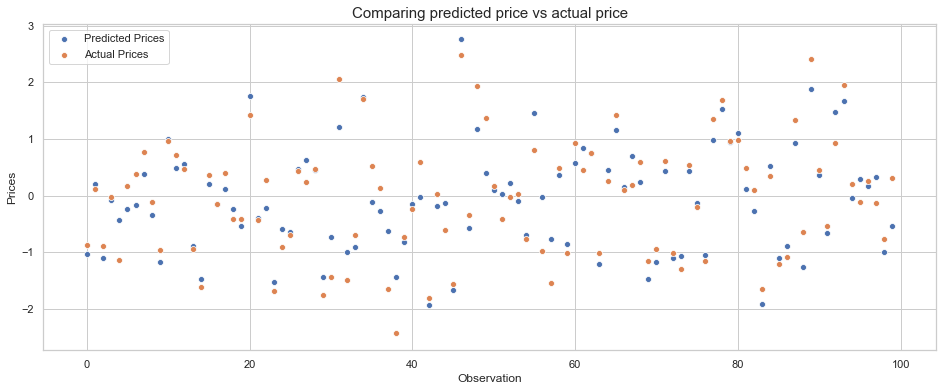

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [607]:
#set the new predictors

y = df_final.price
X = df_final[result]

#run the model
sklearnmodel (y, X)


The results after stepwise selection is almost identical with the previous model. Let's run the cross validation and see how th emodel perform. 

### Cross Validation

In [608]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


def cross_validation (X,y,fold):
    mse =np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
    score = cross_val_score(linreg, X, y, cv=5, scoring="r2")
    print (fold, "Fold Cros Validation" )
    print ('--------------------------')
    print ('Mean Squarred Error :', mse)
    print ('Model Accuracy :', round(sum(score)/len(score),2)*100, '%' )
    
cross_validation(X,y,10)    

10 Fold Cros Validation
--------------------------
Mean Squarred Error : -0.19219718122072843
Model Accuracy : 81.0 %


Cross validatio MSE is also 0.19, and the accuaracy is 81% so the model seems consistent among the data.  
I would like to check cross validation with the features that has p value grater than 0.05. This time i will check 10 fold.

### Feature Selection with RFE 
    

I would like to see if selecting top predictors would help my model to work better. For that, I will use RFE method from  sklearn.feature_selection library.  

R^2 Score: 0.78
Train Mean Squarred Error: 0.21702018995982725
Test Mean Squarred Error: 0.22110580508235703


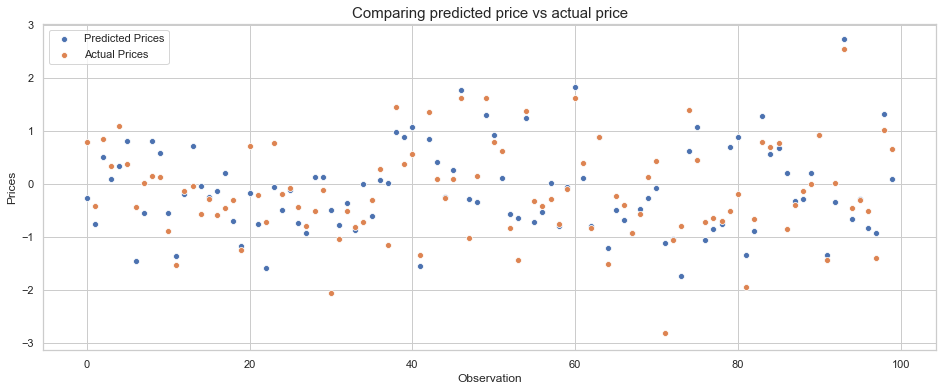

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [609]:

from sklearn.feature_selection import RFE

# select top 20 predictors using RFE
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 20)
selector = selector.fit(X, y)
top20=X[X.columns[selector.support_]]
top20


#run the model 
sklearnmodel (y, top20)


Well, this is surprising, but not unexpected. R^2 went down to 0.78 and MSE increased 0.22. The reason would be the decreased number of predictors that contributed to the model. Apperantly, this model predicts better when I feed it with more data drom various variables which is totaly understandable. Who does not like more information to make a decision. 


R^2 Score: 0.81
Train Mean Squarred Error: 0.19049329082932126
Test Mean Squarred Error: 0.19112659650795935


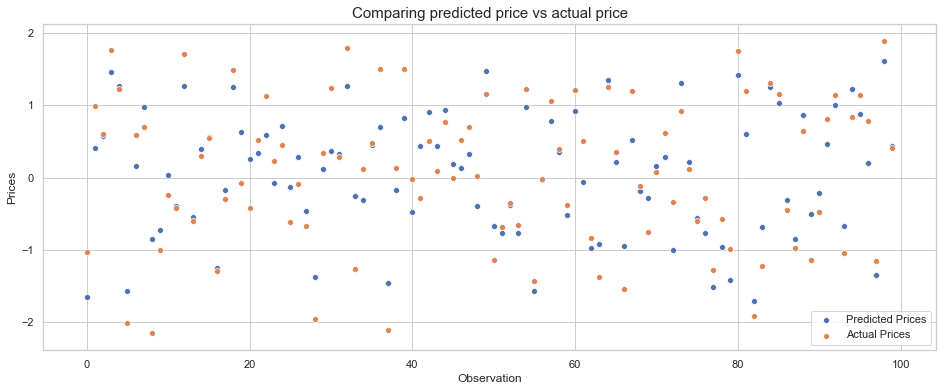

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [636]:
#Running the model for top 50 features
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 40)
selector = selector.fit(X, y)
top20=X[X.columns[selector.support_]]
top20


#run the model 
linreg=sklearnmodel (y, top20)
linreg

Top 50 features perform much better. 

## Most Significat Features

In [669]:
import numpy as np
topfeatures=X[X.columns[selector.support_]]
#print (topfeatures)
"""a=np.asarray(linreg.coef_)
b=np.asarray(topfeatures)
top=np.array
for i in range(len(topfeatures)-1):
    top[0][i]=topfeatures[i]
    top[1][i]=linreg.coef_"""
topfeatures    

IndexError: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 37